In [100]:
from __future__ import print_function
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras import backend as K

In [101]:
#7200 datasets
dfAwake_train = pd.read_csv('Data/Validation/Individual Data/AData2.txt', header=None, delim_whitespace=True)
dfDrowsy_train = pd.read_csv('Data/Validation/Individual Data/DData2.txt', header=None, delim_whitespace=True)
# dfAwake_train2 = pd.read_csv('Data/Validation/Individual Data/AData2.txt', header=None, delim_whitespace=True)
# dfDrowsy_train2 = pd.read_csv('Data/Validation/Individual Data/DData2.txt', header=None, delim_whitespace=True)
# dfAwake_train3 = pd.read_csv('Data/Validation/Individual Data/AData3.txt', header=None, delim_whitespace=True)
# dfDrowsy_train3 = pd.read_csv('Data/Validation/Individual Data/DData3.txt', header=None, delim_whitespace=True)


# dfAwake_train1 = pd.read_csv('Data/Validation/validation_AData.txt', header=None, delim_whitespace=True)
# dfDrowsy_train1 = pd.read_csv('Data/Validation/validation_DData.txt', header=None, delim_whitespace=True)
# dfAwake_train2 = pd.read_csv('Data/testing_AData.txt', header=None, delim_whitespace=True)
# dfDrowsy_train2 = pd.read_csv('Data/testing_DData.txt', header=None, delim_whitespace=True)
# dfAwake_train2 = pd.read_csv('Data/Data for 2nd Level Classification/testing2_AData.txt', header=None, delim_whitespace=True)
# dfDrowsy_train2 = pd.read_csv('Data/Data for 2nd Level Classification/testing2_DData.txt', header=None, delim_whitespace=True)

# dfAwake_train = pd.read_csv('Data/Subset Data/for PERCLOS/Subset 5/subset5_train_AData.txt', header=None, delim_whitespace=True)
# dfDrowsy_train = pd.read_csv('Data/Subset Data/for PERCLOS/Subset 5/subset5_train_DData.txt', header=None, delim_whitespace=True)
# dfAwake_test = pd.read_csv('Data/Data for 2nd Level Classification/testing2_AData.txt', header=None, delim_whitespace=True)
# dfDrowsy_test = pd.read_csv('Data/Data for 2nd Level Classification/testing2_DData.txt', header=None, delim_whitespace=True)

In [102]:
# Awake_frames = [dfAwake_train1, dfAwake_train3]
# Drowsy_frames = [dfDrowsy_train1, dfDrowsy_train3]
# dfAwake_train = pd.concat(Awake_frames)
# dfDrowsy_train = pd.concat(Drowsy_frames)

In [103]:
print(dfAwake_train.shape)
print(dfDrowsy_train.shape)
# print(dfAwake_test.shape)
# print(dfDrowsy_test.shape)

(540000, 15)
(540000, 15)


### Copying dataframe for individual Modules

In [104]:
dfAwakeIMU_train = dfAwakePerclos_train = dfAwakeEEG_train = dfAwake_train
dfDrowsyIMU_train = dfDrowsyPerclos_train = dfDrowsyEEG_train = dfDrowsy_train
# dfAwakeIMU_test = dfAwakePerclos_test = dfAwakeEEG_test = dfAwake_test
# dfDrowsyIMU_test = dfDrowsyPerclos_test = dfDrowsyEEG_test = dfDrowsy_test

In [105]:
print(dfAwakeIMU_train.shape)
print(dfDrowsyIMU_train.shape)
# print(dfAwakeIMU_test.shape)
# print(dfDrowsyIMU_test.shape)

(540000, 15)
(540000, 15)


In [106]:
print(dfAwakePerclos_train.shape)
print(dfDrowsyPerclos_train.shape)
# print(dfAwakePerclos_test.shape)
# print(dfDrowsyPerclos_test.shape)

(540000, 15)
(540000, 15)


In [107]:
print(dfAwakeEEG_train.shape)
print(dfDrowsyEEG_train.shape)
# print(dfAwakeEEG_test.shape)
# print(dfDrowsyEEG_test.shape)

(540000, 15)
(540000, 15)


### Dropping Unnecessary Columns for particular Modules

In [108]:
### For IMU
dfAwakeIMU_train = dfAwakeIMU_train.drop(14,axis = 1)
dfAwakeIMU_train = dfAwakeIMU_train.drop(dfAwakeIMU_train.iloc[:,0:12],axis = 1)
dfDrowsyIMU_train = dfDrowsyIMU_train.drop(14,axis = 1)
dfDrowsyIMU_train = dfDrowsyIMU_train.drop(dfDrowsyIMU_train.iloc[:,0:12],axis = 1)
# dfAwakeIMU_test = dfAwakeIMU_test.drop(14,axis = 1)
# dfAwakeIMU_test = dfAwakeIMU_test.drop(dfAwakeIMU_test.iloc[:,0:12],axis = 1)
# dfDrowsyIMU_test = dfDrowsyIMU_test.drop(14,axis = 1)
# dfDrowsyIMU_test = dfDrowsyIMU_test.drop(dfDrowsyIMU_test.iloc[:,0:12],axis = 1)

print(dfAwakeIMU_train)
print(dfDrowsyIMU_train)

              12        13
0      -0.004991 -0.012289
1      -0.026580  0.042095
2      -0.024016  0.034277
3      -0.027958  0.001679
4      -0.023743 -0.002415
...          ...       ...
539995 -0.003002 -0.019220
539996  0.007412  0.001263
539997 -0.000026 -0.008946
539998  0.018446  0.006562
539999  0.005884 -0.006587

[540000 rows x 2 columns]
              12        13
0      -0.006646 -0.000191
1      -0.008065 -0.010442
2       0.001410  0.005196
3       0.011025  0.000535
4       0.007304 -0.000485
...          ...       ...
539995  0.030498 -0.012245
539996  0.025213  0.012352
539997 -0.008896  0.012818
539998  0.003654 -0.010252
539999  0.022081  0.029251

[540000 rows x 2 columns]


In [109]:
### FOR PERCLOS
dfAwakePerclos_train = dfAwakePerclos_train.drop(dfAwakePerclos_train.iloc[:,0:14],axis = 1)
dfDrowsyPerclos_train = dfDrowsyPerclos_train.drop(dfDrowsyPerclos_train.iloc[:,0:14],axis = 1)
# dfAwakePerclos_test = dfAwakePerclos_test.drop(dfAwakePerclos_test.iloc[:,0:14],axis = 1)
# dfDrowsyPerclos_test = dfDrowsyPerclos_test.drop(dfDrowsyPerclos_test.iloc[:,0:14],axis = 1)

print(dfAwakePerclos_train)
print(dfDrowsyPerclos_train)

         14
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
...     ...
539995  0.0
539996  0.0
539997  0.0
539998  0.0
539999  0.0

[540000 rows x 1 columns]
               14
0        8.555555
1        8.555555
2        8.555555
3        8.555555
4        8.555555
...           ...
539995  22.888889
539996  22.777779
539997  22.777779
539998  23.222223
539999  23.222223

[540000 rows x 1 columns]


In [110]:
### For EEG
dfAwakeEEG_train = dfAwakeEEG_train.drop(dfAwakeEEG_train.iloc[:,11:15],axis = 1)
dfAwakeEEG_train = dfAwakeEEG_train.drop(dfAwakeEEG_train.iloc[:,0:3],axis = 1)
dfDrowsyEEG_train = dfDrowsyEEG_train.drop(dfDrowsyEEG_train.iloc[:,11:15],axis = 1)
dfDrowsyEEG_train = dfDrowsyEEG_train.drop(dfDrowsyEEG_train.iloc[:,0:3],axis = 1)
# dfAwakeEEG_test = dfAwakeEEG_test.drop(dfAwakeEEG_test.iloc[:,11:15],axis = 1)
# dfAwakeEEG_test = dfAwakeEEG_test.drop(dfAwakeEEG_test.iloc[:,0:3],axis = 1)
# dfDrowsyEEG_test = dfDrowsyEEG_test.drop(dfDrowsyEEG_test.iloc[:,11:15],axis = 1)
# dfDrowsyEEG_test = dfDrowsyEEG_test.drop(dfDrowsyEEG_test.iloc[:,0:3],axis = 1)

print(dfAwakeEEG_train)
print(dfDrowsyEEG_train)

        3         4         5         6         7         8         9   \
0        1  0.525227  0.187351  0.021937  0.421053  0.087825  0.077120   
1        1  0.525227  0.187351  0.021937  0.421053  0.087825  0.077120   
2        1  0.525227  0.187351  0.021937  0.421053  0.087825  0.077120   
3        1  0.370602  0.031048  0.014259  0.012687  0.022052  0.018130   
4        1  0.370602  0.031048  0.014259  0.012687  0.022052  0.018130   
...     ..       ...       ...       ...       ...       ...       ...   
539995   1  0.127508  0.068039  0.012409  0.046695  0.025934  0.026758   
539996   1  0.029756  0.009655  0.006366  0.021712  0.008406  0.007814   
539997   1  0.029756  0.009655  0.006366  0.021712  0.008406  0.007814   
539998   1  0.029756  0.009655  0.006366  0.021712  0.008406  0.007814   
539999   1  0.046604  0.021132  0.027070  0.045697  0.032134  0.012888   

              10  
0       0.114739  
1       0.114739  
2       0.114739  
3       0.014241  
4       0.014241

In [111]:
print("IMU Shapes:")
print(dfAwakeIMU_train.shape)
print(dfDrowsyIMU_train.shape)
# print(dfAwakeIMU_test.shape)
# print(dfDrowsyIMU_test.shape)
print("Perclos Shapes:")
print(dfAwakePerclos_train.shape)
print(dfDrowsyPerclos_train.shape)
# print(dfAwakePerclos_test.shape)
# print(dfDrowsyPerclos_test.shape)
print("EEG Shapes:")
print(dfAwakeEEG_train.shape)
print(dfDrowsyEEG_train.shape)
# print(dfAwakeEEG_test.shape)
# print(dfDrowsyEEG_test.shape)

IMU Shapes:
(540000, 2)
(540000, 2)
Perclos Shapes:
(540000, 1)
(540000, 1)
EEG Shapes:
(540000, 8)
(540000, 8)


### Reshaping Data

In [112]:
### FOR IMU
dfAwakeIMU_train = dfAwakeIMU_train.to_numpy()
dfDrowsyIMU_train = dfDrowsyIMU_train.to_numpy()
dfAwakeIMU_train = dfAwakeIMU_train.reshape(600,900,2) # 3234 for subsets
dfDrowsyIMU_train = dfDrowsyIMU_train.reshape(600,900,2) # 2700 for subsets
# dfAwakeIMU_test = dfAwakeIMU_test.to_numpy()
# dfDrowsyIMU_test = dfDrowsyIMU_test.to_numpy()
# dfAwakeIMU_test = dfAwakeIMU_test.reshape(900,900,2)
# dfDrowsyIMU_test = dfDrowsyIMU_test.reshape(1200,900,2)

### FOR PERCLOS
dfAwakePerclos_train = dfAwakePerclos_train.to_numpy()
dfDrowsyPerclos_train = dfDrowsyPerclos_train.to_numpy()
dfAwakePerclos_train = dfAwakePerclos_train.reshape(600,900,1)
dfDrowsyPerclos_train = dfDrowsyPerclos_train.reshape(600,900,1)
# dfAwakePerclos_test = dfAwakePerclos_test.to_numpy()
# dfDrowsyPerclos_test = dfDrowsyPerclos_test.to_numpy()
# dfAwakePerclos_test = dfAwakePerclos_test.reshape(900,900,1)
# dfDrowsyPerclos_test = dfDrowsyPerclos_test.reshape(1200,900,1)

### FOR EEG
dfAwakeEEG_train = dfAwakeEEG_train.to_numpy()
dfDrowsyEEG_train = dfDrowsyEEG_train.to_numpy()
dfAwakeEEG_train = dfAwakeEEG_train.reshape(600,900,8)
dfDrowsyEEG_train = dfDrowsyEEG_train.reshape(600,900,8)
# dfAwakeEEG_test = dfAwakeEEG_test.to_numpy()
# dfDrowsyEEG_test = dfDrowsyEEG_test.to_numpy()
# dfAwakeEEG_test = dfAwakeEEG_test.reshape(900,900,8)
# dfDrowsyEEG_test = dfDrowsyEEG_test.reshape(1200,900,8)


In [113]:
print("IMU Shapes:")
print(dfAwakeIMU_train.shape)
print(dfDrowsyIMU_train.shape)
# print(dfAwakeIMU_test.shape)
# print(dfDrowsyIMU_test.shape)
print("Perclos Shapes:")
print(dfAwakePerclos_train.shape)
print(dfDrowsyPerclos_train.shape)
# print(dfAwakePerclos_test.shape)
# print(dfDrowsyPerclos_test.shape)
print("EEG Shapes:")
print(dfAwakeEEG_train.shape)
print(dfDrowsyEEG_train.shape)
# print(dfAwakeEEG_test.shape)
# print(dfDrowsyEEG_test.shape)

IMU Shapes:
(600, 900, 2)
(600, 900, 2)
Perclos Shapes:
(600, 900, 1)
(600, 900, 1)
EEG Shapes:
(600, 900, 8)
(600, 900, 8)


In [114]:
dfAwake_trainLabels = np.zeros(600)
print(dfAwake_trainLabels.shape)
dfDrowsy_trainLabels = np.ones(600)
print(dfDrowsy_trainLabels.shape)
# dfAwake_testLabels = np.zeros(900)
# print(dfAwake_testLabels.shape)
# dfDrowsy_testLabels = np.ones(1200)
# print(dfDrowsy_testLabels.shape)

(600,)
(600,)


In [115]:
print(dfAwake_trainLabels)
print(dfDrowsy_trainLabels)
# print(dfAwake_testLabels)
# print(dfDrowsy_testLabels)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

### Combining Awake Data and Drowsy Data

In [116]:
# dftrainIMU = dfAwakeIMU_train
# dftrainPerclos = dfAwakePerclos_train
# dftrainEEG = dfAwakeEEG_train
# dftrainlabels = dfAwake_trainLabels
dftrainIMU = np.concatenate((dfAwakeIMU_train, dfDrowsyIMU_train))
dftrainPerclos = np.concatenate((dfAwakePerclos_train, dfDrowsyPerclos_train))
dftrainEEG = np.concatenate((dfAwakeEEG_train, dfDrowsyEEG_train))
dftrainlabels = np.concatenate((dfAwake_trainLabels, dfDrowsy_trainLabels))
print(dftrainIMU.shape)
print(dftrainPerclos.shape)
print(dftrainEEG.shape)
print(dftrainlabels.shape)
print(dftrainIMU)
print(dftrainPerclos)
print(dftrainEEG)
print(dftrainlabels)

(1200, 900, 2)
(1200, 900, 1)
(1200, 900, 8)
(1200,)
[[[-0.0049912  -0.01228897]
  [-0.02658015  0.04209471]
  [-0.02401646  0.03427691]
  ...
  [-0.01505767  0.00072728]
  [-0.01258709 -0.00507971]
  [-0.02270618  0.0195644 ]]

 [[-0.02658015  0.04209471]
  [-0.02401646  0.03427691]
  [-0.02795795  0.00167872]
  ...
  [-0.01258709 -0.00507971]
  [-0.02270618  0.0195644 ]
  [-0.01358249  0.01359302]]

 [[-0.02401646  0.03427691]
  [-0.02795795  0.00167872]
  [-0.02374288 -0.00241484]
  ...
  [-0.02270618  0.0195644 ]
  [-0.01358249  0.01359302]
  [-0.01070532  0.00254426]]

 ...

 [[-0.00869238  0.00032933]
  [ 0.0079058  -0.00863488]
  [ 0.00409615 -0.00566169]
  ...
  [ 0.03049769 -0.01224534]
  [ 0.02521335  0.01235201]
  [-0.00889551  0.01281838]]

 [[ 0.0079058  -0.00863488]
  [ 0.00409615 -0.00566169]
  [-0.00035878  0.01276773]
  ...
  [ 0.02521335  0.01235201]
  [-0.00889551  0.01281838]
  [ 0.00365369 -0.01025151]]

 [[ 0.00409615 -0.00566169]
  [-0.00035878  0.01276773]
  [-0

### SHUFFLING DATA

In [117]:
# idx = np.random.permutation(len(dftrainlabels))
# print(idx)

In [118]:
# dftrainIMU=dftrainIMU[idx]
# dftrainPerclos=dftrainPerclos[idx]
# dftrainEEG=dftrainEEG[idx]
# dftrainlabels=dftrainlabels[idx]

In [119]:
print(dftrainIMU.shape)
print(dftrainPerclos.shape)
print(dftrainEEG.shape)
print(dftrainlabels.shape)
print(dftrainIMU)
print(dftrainPerclos)
print(dftrainEEG)
print(dftrainlabels)

(1200, 900, 2)
(1200, 900, 1)
(1200, 900, 8)
(1200,)
[[[-0.0049912  -0.01228897]
  [-0.02658015  0.04209471]
  [-0.02401646  0.03427691]
  ...
  [-0.01505767  0.00072728]
  [-0.01258709 -0.00507971]
  [-0.02270618  0.0195644 ]]

 [[-0.02658015  0.04209471]
  [-0.02401646  0.03427691]
  [-0.02795795  0.00167872]
  ...
  [-0.01258709 -0.00507971]
  [-0.02270618  0.0195644 ]
  [-0.01358249  0.01359302]]

 [[-0.02401646  0.03427691]
  [-0.02795795  0.00167872]
  [-0.02374288 -0.00241484]
  ...
  [-0.02270618  0.0195644 ]
  [-0.01358249  0.01359302]
  [-0.01070532  0.00254426]]

 ...

 [[-0.00869238  0.00032933]
  [ 0.0079058  -0.00863488]
  [ 0.00409615 -0.00566169]
  ...
  [ 0.03049769 -0.01224534]
  [ 0.02521335  0.01235201]
  [-0.00889551  0.01281838]]

 [[ 0.0079058  -0.00863488]
  [ 0.00409615 -0.00566169]
  [-0.00035878  0.01276773]
  ...
  [ 0.02521335  0.01235201]
  [-0.00889551  0.01281838]
  [ 0.00365369 -0.01025151]]

 [[ 0.00409615 -0.00566169]
  [-0.00035878  0.01276773]
  [-0

In [120]:
# dftestIMU = np.concatenate((dfAwakeIMU_test, dfDrowsyIMU_test))
# dftestPerclos = np.concatenate((dfAwakePerclos_test, dfDrowsyPerclos_test))
# dftestEEG = np.concatenate((dfAwakeEEG_test, dfDrowsyEEG_test))
# dftestlabels =np.concatenate((dfAwake_testLabels, dfDrowsy_testLabels))
# print(dftestIMU.shape)
# print(dftestPerclos.shape)
# print(dftestEEG.shape)
# print(dftestlabels.shape)
# print(dftestIMU)
# print(dftestPerclos)
# print(dftestEEG)
# print(dftestlabels)

In [121]:
dftrainIMU = dftrainIMU.astype('float32')
dftrainPerclos = dftrainPerclos.astype('float32')
dftrainEEG = dftrainEEG.astype('float32')
dftrainlabels = dftrainlabels.astype('float32')

dftrainlabels_hot = np_utils.to_categorical(dftrainlabels, 2)

In [122]:
print('New dfttrainlabels shape: ', dftrainlabels_hot)
print('New dfttrainlabels shape: ', dftrainlabels.shape)
print('New dfttrainlabels shape: ', dftrainlabels)

New dfttrainlabels shape:  [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
New dfttrainlabels shape:  (1200,)
New dfttrainlabels shape:  [0. 0. 0. ... 1. 1. 1.]


In [123]:
LABELS = ['Awake','Drowsy']

### Loading Models And Evaluating training Data from Each Module

In [124]:
### FOR IMU
modelIMU = keras.models.load_model("best_model(imuv3).h5")

train_loss, train_acc = modelIMU.evaluate(dftrainIMU, dftrainlabels,verbose=1)

print("IMU:")
print("Train accuracy", train_acc)
print("Train loss", train_loss)

### FOR PERCLOS
modelPerclos = keras.models.load_model("best_model(perclosv2).h5")

train_loss, train_acc = modelPerclos.evaluate(dftrainPerclos, dftrainlabels,verbose=1)

print("PERCLOS:")
print("Train accuracy", train_acc)
print("Train loss", train_loss)

### FOR EEG
modelEEG = keras.models.load_model("best_model(eegv2).h5")

train_loss, train_acc = modelEEG.evaluate(dftrainEEG, dftrainlabels,verbose=1)

print("EEG:")
print("Train accuracy", train_acc)
print("Train loss", train_loss)

38/38 [==============================] - 0s 2ms/step - loss: 0.5329 - sparse_categorical_accuracy: 0.7500
IMU:
Train accuracy 0.75
Train loss 0.532899022102356
38/38 [==============================] - 0s 2ms/step - loss: 0.0203 - sparse_categorical_accuracy: 1.0000
PERCLOS:
Train accuracy 1.0
Train loss 0.02033764123916626
38/38 [==============================] - 0s 3ms/step - loss: 0.9856 - sparse_categorical_accuracy: 0.5000
EEG:
Train accuracy 0.5
Train loss 0.985569179058075


In [125]:
y_pred_train_IMU = modelIMU.predict(dftrainIMU)
y_pred_train_Perclos = modelPerclos.predict(dftrainPerclos)
y_pred_train_EEG = modelEEG.predict(dftrainEEG)
max_y_train = np.argmax(dftrainlabels_hot, axis=1)

max_y_pred_train_IMU = np.argmax(y_pred_train_IMU, axis=1)
max_y_pred_train_Perclos = np.argmax(y_pred_train_Perclos, axis=1)
max_y_pred_train_EEG = np.argmax(y_pred_train_EEG, axis=1)

38/38 [==============================] - 0s 2ms/step


IMU Confusion matrix


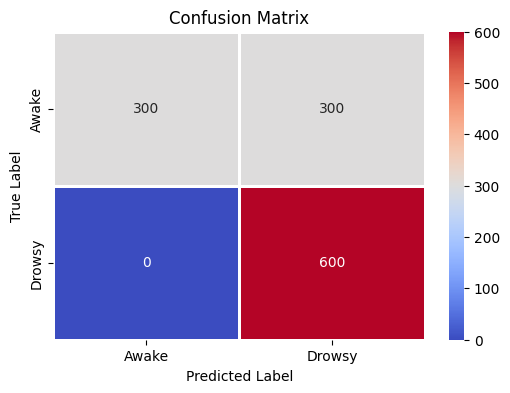

PERCLOS Confusion matrix


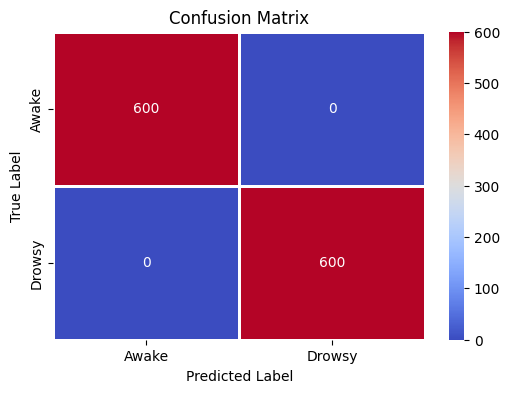

EEG Confusion matrix


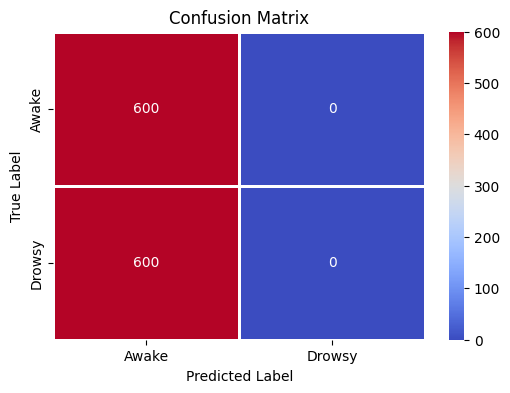

In [126]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

print("IMU Confusion matrix")
show_confusion_matrix(max_y_train, max_y_pred_train_IMU)
print("PERCLOS Confusion matrix")
show_confusion_matrix(max_y_train, max_y_pred_train_Perclos)
print("EEG Confusion matrix")
show_confusion_matrix(max_y_train, max_y_pred_train_EEG)

### Getting Results compared to Actual label of data

In [ ]:
print("Results of Model for IMU:")
print(max_y_pred_train_IMU)
print("Results of Model for Perclos:")
print(max_y_pred_train_Perclos)
print("Results of Model for EEG:")
print(max_y_pred_train_EEG)
print("Actual Label:")
print(max_y_train)

# with np.printoptions(threshold=np.inf):
#     print("Results of Model for IMU:")
#     print(max_y_pred_train_IMU)
#     print("Results of Model for Perclos:")
#     print(max_y_pred_train_Perclos)
#     print("Results of Model for EEG:")
#     print(max_y_pred_train_EEG)
#     print("Actual Label:")
#     print(max_y_train)

In [ ]:
print(max_y_train.shape)

### Reshaping Results

In [ ]:
max_y_pred_train_IMU = np.array(max_y_pred_train_IMU)
max_y_pred_train_Perclos = np.array(max_y_pred_train_Perclos)
max_y_pred_train_EEG = np.array(max_y_pred_train_EEG)
max_y_train = np.array(max_y_train)


max_y_pred_train_IMU = max_y_pred_train_IMU.reshape(5700,)
max_y_pred_train_Perclos = max_y_pred_train_Perclos.reshape(5700,)
max_y_pred_train_EEG = max_y_pred_train_EEG.reshape(5700,)
max_y_train = max_y_train.reshape(5700,)

In [ ]:
print(max_y_pred_train_IMU.shape)
print(max_y_pred_train_Perclos.shape)
print(max_y_pred_train_EEG.shape)
print(max_y_train.shape)

In [ ]:
max_y_pred_train_IMU = pd.DataFrame(max_y_pred_train_IMU)
max_y_pred_train_Perclos = pd.DataFrame(max_y_pred_train_Perclos)
max_y_pred_train_EEG = pd.DataFrame(max_y_pred_train_EEG)
max_y_train = pd.DataFrame(max_y_train)

In [ ]:
print(max_y_pred_train_IMU.shape)
print(max_y_pred_train_Perclos.shape)
print(max_y_pred_train_EEG.shape)
print(max_y_train.shape)

In [ ]:
print(max_y_pred_train_IMU)
print(max_y_pred_train_Perclos)
print(max_y_pred_train_EEG)
print(max_y_train)

### Saving Training Results to a File

In [ ]:
max_y_pred_train_IMU.to_csv('imuData.txt',index=False,encoding = 'utf-8')
max_y_pred_train_Perclos.to_csv('perclosData.txt',index=False,encoding = 'utf-8')
max_y_pred_train_EEG.to_csv('eegData.txt',index=False,encoding = 'utf-8')
max_y_train.to_csv('labelsData.txt',index=False,encoding = 'utf-8')

### Do the same for Testing Data

In [ ]:
# dftestIMU = dftestIMU.astype('float32')
# dftestPerclos = dftestPerclos.astype('float32')
# dftestEEG = dftestEEG.astype('float32')
# dftestlabels = dftestlabels.astype('float32')

# dftestlabels_hot = np_utils.to_categorical(dftestlabels, 2)

In [ ]:
# print('New dfttrainlabels shape: ', dftestlabels_hot)
# print('New dfttrainlabels shape: ', dftestlabels.shape)
# print('New dfttrainlabels shape: ', dftestlabels)

In [ ]:
# ### FOR IMU
# modelIMU = keras.models.load_model("best_model(imuv3).h5")

# test_loss, test_acc = modelIMU.evaluate(dftestIMU, dftestlabels,verbose=1)

# print("IMU:")
# print("Test accuracy", test_acc)
# print("Test loss", test_loss)

# ### FOR PERCLOS
# modelPerclos = keras.models.load_model("best_model(perclosv2).h5")

# test_loss, test_acc = modelPerclos.evaluate(dftestPerclos, dftestlabels,verbose=1)

# print("PERCLOS:")
# print("Test accuracy", test_acc)
# print("Test loss", test_loss)

# ### FOR EEG
# modelEEG = keras.models.load_model("best_model(eeg).h5")

# test_loss, test_acc = modelEEG.evaluate(dftestEEG, dftestlabels,verbose=1)

# print("EEG:")
# print("Test accuracy", test_acc)
# print("Test loss", test_loss)

In [ ]:
# y_pred_test_IMU = modelIMU.predict(dftestIMU)
# y_pred_test_Perclos = modelPerclos.predict(dftestPerclos)
# y_pred_test_EEG = modelEEG.predict(dftestEEG)
# max_y_test = np.argmax(dftestlabels_hot, axis=1)

# max_y_pred_test_IMU = np.argmax(y_pred_test_IMU, axis=1)
# max_y_pred_test_Perclos = np.argmax(y_pred_test_Perclos, axis=1)
# max_y_pred_test_EEG = np.argmax(y_pred_test_EEG, axis=1)

In [ ]:
# print("Results of Model for IMU:")
# print(max_y_pred_test_IMU)
# print("Results of Model for Perclos:")
# print(max_y_pred_test_Perclos)
# print("Results of Model for EEG:")
# print(max_y_pred_test_EEG)
# print("Actual Label:")
# print(max_y_test)

In [ ]:
# print(max_y_test.shape)

In [ ]:
# max_y_pred_test_IMU = np.array(max_y_pred_test_IMU)
# max_y_pred_test_Perclos = np.array(max_y_pred_test_Perclos)
# max_y_pred_test_EEG = np.array(max_y_pred_test_EEG)
# max_y_test = np.array(max_y_test)


# max_y_pred_test_IMU = max_y_pred_test_IMU.reshape(2100,)
# max_y_pred_test_Perclos = max_y_pred_test_Perclos.reshape(2100,)
# max_y_pred_test_EEG = max_y_pred_test_EEG.reshape(2100,)
# max_y_test = max_y_test.reshape(2100,)

In [ ]:
# print(max_y_pred_test_IMU.shape)
# print(max_y_pred_test_Perclos.shape)
# print(max_y_pred_test_EEG.shape)
# print(max_y_test.shape)

In [ ]:
# max_y_pred_test_IMU = pd.DataFrame(max_y_pred_test_IMU)
# max_y_pred_test_Perclos = pd.DataFrame(max_y_pred_test_Perclos)
# max_y_pred_test_EEG = pd.DataFrame(max_y_pred_test_EEG)
# max_y_test = pd.DataFrame(max_y_test)

In [ ]:
# print(max_y_pred_test_IMU.shape)
# print(max_y_pred_test_Perclos.shape)
# print(max_y_pred_test_EEG.shape)
# print(max_y_test.shape)

In [ ]:
# print(max_y_pred_test_IMU)
# print(max_y_pred_test_Perclos)
# print(max_y_pred_test_EEG)
# print(max_y_test)

In [ ]:
# max_y_pred_test_IMU.to_csv('imuDatatest.txt',index=False,encoding = 'utf-8')
# max_y_pred_test_Perclos.to_csv('perclosDatatest.txt',index=False,encoding = 'utf-8')
# max_y_pred_test_EEG.to_csv('eegDatatest.txt',index=False,encoding = 'utf-8')
# max_y_test.to_csv('labelsDatatest.txt',index=False,encoding = 'utf-8')